1 [-0.16842513  0.1678386   0.2067294   2.0390069   2.03346536] 0.3
2 [-0.16842513  0.1678386   0.2067294   2.0390069   2.03346536] 0.3
3 [-0.16891852  0.16833125  0.20632823  2.04051633  2.03493843] 0.299691867444732
4 [-0.16990196  0.1693134   0.20552877  2.04353472  2.03788336] 0.2990756023341959
5 [-0.17136434  0.17077459  0.20433993  2.04804642  2.04228429] 0.2981531767734476


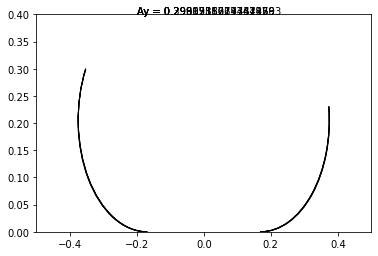

In [23]:
import math as mt
from matplotlib import patches
from celluloid import Camera
from matplotlib import pyplot
import numpy as np

def F(n, X, Ay):
    f = np.zeros(n)
    f[0] = (X[0] + X[2] * mt.cos(3 * mt.pi / 2 - X[3]) + 0.353)
    f[1] = (X[1] + X[2] * mt.cos(3 * mt.pi / 2 + X[4]) - 0.353)
    f[2] = (X[2] + X[2] * mt.sin(3 * mt.pi / 2 - X[3]) - Ay)
    f[3] = ((X[3] + X[4]) * X[2] + (X[1] - X[0]) - (3 * mt.pi / 8))
    f[4] = (X[2] + X[2] * mt.sin(3 * mt.pi / 2 + X[4]) - Ay)    
    return f

def Condition(n, X, Ay):
    f = F(n, X, Ay)
    for i in range(n):
        if (abs(f[i]) > eps):
            return 0
    return 1

def Calculation(n, Ay):
    X = np.zeros(n)
    while (Condition(n, X, Ay) == False):
        for i in range(n):
            X[i] = X[i] - F(n, X, Ay)[i] * tau
    return X

Ay, Uy = 0.3, 0.0     

n = 5
eps, tau = 1e-3, 5e-3
dT, M, p, g = 1e-2, 100, 2000, 9.8066

fig = pyplot.figure()
ax = pyplot.axes(xlim = (-0.5, 0.5), ylim = (0, 0.4))
camera = Camera(fig)

for i in range((4 * n ** 2) - 5):
    X = Calculation(n, Ay)
    print(i + 1, X, Ay)
    x1, x2 = X[0], X[1]
    l = x2 - x1
    y, ph1, ph2 = X[2], X[3], X[4]
    Ay += Uy * dT
    Uy += (1 / M) * (p * l - M * g) * dT
    f1 = patches.Arc((x1, y), 2 * y, 2 * y, angle = 0.0, theta1 = (3 * mt.pi / 2 - ph1) * (180 / mt.pi), theta2 = 3 * 180 / 2, 
                     linewidth = 1)
    f2 = patches.Arc((x2, y), 2 * y, 2 * y, angle = 0.0, theta1 = 3 * 180 / 2, theta2 = (3 * mt.pi / 2 + ph2), 
                     linewidth = 1)
    pyplot.text(-0.2, 0.42, f"Ay = {Ay}")
    ax.add_patch(f1)
    ax.add_patch(f2)
    camera.snap()

animation = camera.animate()
pyplot.show()
# animation.save('cylinders.gif', writer = 'imagemagick')
